In [1]:
# target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
a=3
b=-2
c=-3
d=4

def eval(a, b, c, d, vector):
  return a*vector*vector*vector + b*vector*vector + c*vector + d


In [5]:
# target parameters of f(x) = m*x + b
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True' #Serve a risolvere errore "Dead Kernel"


In [3]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = eval(a, b, c, d, x_valid) 

sigma = 0.5 #noise
y_train = np.random.normal(eval(a, b, c, d, x_train) , sigma) 
y_valid = np.random.normal(eval(a, b, c, d, x_valid) , sigma)

model = tf.keras.Sequential()
model2 = tf.keras.Sequential()
model3 = tf.keras.Sequential()
model4 = tf.keras.Sequential()


In [12]:
model.add(Dense(5, input_shape=(1,), activation='relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, ))


model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, 
          validation_data=(x_valid, y_valid))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1

2000/2000 [==============================] - 0s 157us/sample - loss: 1.2944 - mean_absolute_error: 0.9827 - val_loss: 1.2604 - val_mean_absolute_error: 0.9614
Epoch 31/100
2000/2000 [==============================] - 0s 209us/sample - loss: 1.2940 - mean_absolute_error: 0.9825 - val_loss: 1.2617 - val_mean_absolute_error: 0.9616
Epoch 32/100
2000/2000 [==============================] - 0s 160us/sample - loss: 1.2940 - mean_absolute_error: 0.9832 - val_loss: 1.2601 - val_mean_absolute_error: 0.9613
Epoch 33/100
2000/2000 [==============================] - 0s 164us/sample - loss: 1.2944 - mean_absolute_error: 0.9829 - val_loss: 1.2603 - val_mean_absolute_error: 0.9614
Epoch 34/100
2000/2000 [==============================] - 0s 157us/sample - loss: 1.2942 - mean_absolute_error: 0.9828 - val_loss: 1.2606 - val_mean_absolute_error: 0.9614
Epoch 35/100
2000/2000 [==============================] - 0s 148us/sample - loss: 1.2943 - mean_absolute_error: 0.9829 - val_loss: 1.2614 - val_mean_abso

Epoch 78/100
2000/2000 [==============================] - 0s 234us/sample - loss: 1.2942 - mean_absolute_error: 0.9832 - val_loss: 1.2602 - val_mean_absolute_error: 0.9613
Epoch 79/100
2000/2000 [==============================] - 0s 216us/sample - loss: 1.2940 - mean_absolute_error: 0.9825 - val_loss: 1.2618 - val_mean_absolute_error: 0.9617
Epoch 80/100
2000/2000 [==============================] - 0s 197us/sample - loss: 1.2944 - mean_absolute_error: 0.9832 - val_loss: 1.2616 - val_mean_absolute_error: 0.9616
Epoch 81/100
2000/2000 [==============================] - 0s 153us/sample - loss: 1.2941 - mean_absolute_error: 0.9830 - val_loss: 1.2609 - val_mean_absolute_error: 0.9615
Epoch 82/100
2000/2000 [==============================] - 0s 213us/sample - loss: 1.2941 - mean_absolute_error: 0.9830 - val_loss: 1.2601 - val_mean_absolute_error: 0.9613
Epoch 83/100
2000/2000 [==============================] - 0s 208us/sample - loss: 1.2943 - mean_absolute_error: 0.9826 - val_loss: 1.2607 - 

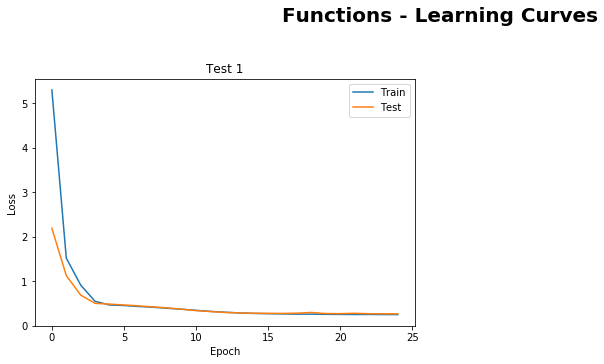

In [6]:

fig=plt.figure(figsize=(15,10))
fig.suptitle('Functions - Learning Curves', fontsize=20, fontweight="bold")


plt.subplot(221)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


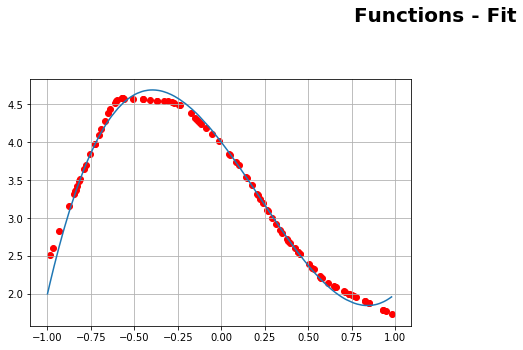

In [7]:
fig=plt.figure(figsize=(15,10))
fig.suptitle('Functions - Fit', fontsize=20, fontweight="bold")

plt.subplot(221)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
